# 受限玻爾茲曼機

## MNIST 資料集

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import linear_model, datasets, metrics
from sklearn.neural_network import BernoulliRBM
from sklearn.pipeline import Pipeline

In [2]:
#從csv檔案中建立numpy陣列
images = np.genfromtxt('./data/mnist_train.csv', delimiter=',')

In [3]:
#顯示第一筆資料
print(images[0])

[  5.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   3.
  18.  18.  18. 126. 136. 175.  26. 166. 255. 247. 127.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.  30.  36.  94. 154. 170.
 253. 253. 253. 253. 253. 225. 172. 253. 242. 195.  64.   0.   0.   0.
   0. 

In [4]:
#總共有6,000個影像，每個影像由28*28的像素 + 1個反應變數所組成
images.shape

(6000, 785)

In [5]:
#提取X與y
images_X, images_y = images[:,1:], images[:,0]

In [6]:
print("特徵:",images_X[0])
print("反應變數:",images_y[0])

特徵: [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   3.  18.
  18.  18. 126. 136. 175.  26. 166. 255. 247. 127.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.  30.  36.  94. 154. 170. 253.
 253. 253. 253. 253. 225. 172. 253. 242. 195.  64.   0.   0.   0.   0.
  

In [7]:
#每一個像素的數值為0~255，但RMB的輸入要為0~1的數值，所以得要進行數值縮放
np.min(images_X), np.max(images_X)

(0.0, 255.0)

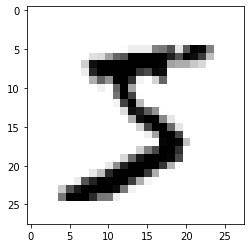

In [8]:
#觀察第一個影像
plt.imshow(images_X[0].reshape(28, 28), cmap=plt.cm.gray_r)

## 伯努力受限玻爾茲曼機(BernoulliRMB)

輸入的數值為二進位數值或者是0到1的數值。可以更快速的學習特徵集

將圖像的每一個點轉換成0或1的數值(也就是黑或白)
1. 將相素的值縮放到0-1之間
2. 如果超過0.5，將值變成真，否則為假

In [9]:
#把數值縮放到0~1
images_X = images_X / 255

In [10]:
print(images_X[0])

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         

In [11]:
#二分像素，先用判別式(>0.5)轉換成True或False，再利用astype轉換成數值形式，True=1，False=0。
images_X = (images_X > 0.5).astype(float)

In [12]:
np.min(images_X), np.max(images_X)

(0.0, 1.0)

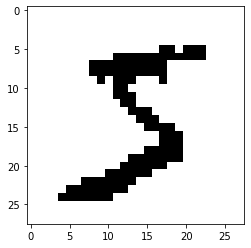

In [13]:
#觀察轉換後的數值影像，變得更清晰了
plt.imshow(images_X[0].reshape(28, 28), cmap=plt.cm.gray_r)

## 從MNIST中提取PCA主成分

In [14]:
from sklearn.decomposition import PCA

In [15]:
#從784個特徵中轉換成100個主成分
pca = PCA(n_components=100)
pca.fit(images_X)

PCA(n_components=100)

In [16]:
#主成分的特徵向量為784*100，將784個特徵轉換成100個主成分
print(pca.components_[0])

[-1.28311457e-17 -3.91976730e-18 -5.52653664e-18 -1.37367694e-18
 -1.60070490e-19  4.89770841e-19  1.39221329e-20  9.37354438e-20
 -1.92346674e-20 -8.79255641e-20 -5.44811325e-21  1.64395009e-20
  2.09705245e-20 -5.27771413e-22  1.27806544e-20  7.87446035e-22
  3.98262878e-22 -9.05363526e-22  1.09285499e-21  1.80031717e-22
  3.29709012e-22 -5.80774348e-22 -2.51229796e-22 -1.61372769e-22
  8.93563714e-23  2.37811694e-22 -2.95085024e-24 -1.35629636e-22
  8.49626044e-23  1.48815141e-23 -7.49335020e-24 -3.33294948e-23
 -5.70172679e-23  2.45000117e-23  3.03449064e-23  8.73111417e-24
  4.24879672e-05  9.91987818e-05  5.67108146e-05  1.45503328e-04
  3.37458604e-05  2.51863647e-05  7.94644813e-05  3.74858723e-05
 -3.15382960e-06  1.66915586e-04  1.19533401e-04 -4.79328415e-06
  6.04593389e-06 -1.57772910e-05 -1.57772910e-05  1.52150160e-24
 -3.95146481e-24  5.53656023e-24 -4.80156527e-24  1.58750649e-24
  4.22012982e-24 -1.40870972e-24 -4.14183585e-24 -3.75606257e-24
  3.90922704e-25 -4.77423

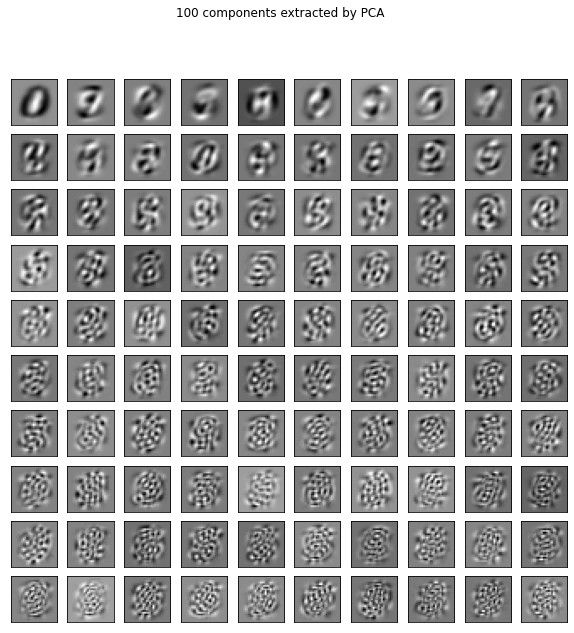

In [17]:
#繪製100個主成分，將特徵向量繪製出來
plt.figure(figsize=(10, 10))

for i, comp in enumerate(pca.components_):
    plt.subplot(10, 10, i+1)
    plt.imshow(comp.reshape((28, 28)), cmap=plt.cm.gray_r)
    plt.xticks(())
    plt.yticks(())
    
plt.suptitle('100 components extracted by PCA')
plt.show()

In [18]:
#觀察主成分的特徵值，可以解釋原始特徵的變異程度
pca.explained_variance_ratio_[:30].sum()

0.63741413987592

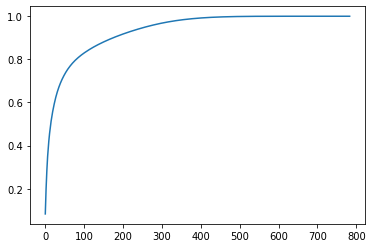

In [19]:
#利用碎石圖觀察PCA的主成分捕獲變異數的變化
full_pca = PCA(n_components=784)
full_pca.fit(images_X)

plt.plot(np.cumsum(full_pca.explained_variance_ratio_))

In [20]:
#將PCA結果擬合到第一筆資料做觀察，將其784個特徵轉成100個主成分表示
#自動化方法
pca.transform(images_X[:1])

array([[ 0.61090568,  1.36377972,  0.42170385, -2.19662828, -0.45181077,
        -1.32049501,  0.79434682,  0.30551119,  1.22978992, -0.72096766,
         0.0816833 , -1.91375636, -2.54647436, -1.62440643,  0.67107353,
         0.15635318,  0.91830977, -0.18981821,  1.30141311,  1.57928728,
         0.99051483,  0.11279895,  1.07343377,  0.70137413, -0.35906602,
         0.16663225,  0.9930888 , -0.73121967,  0.86969022, -0.18629715,
        -0.72497804,  0.112683  ,  0.16099929,  0.07326208,  0.11748393,
        -0.7299198 , -0.29686491,  0.1735073 ,  0.29881965,  2.32453352,
        -0.20341027, -0.85462789,  0.67643655,  0.34735296,  0.34139893,
        -0.4215943 , -0.20655892,  0.39611839, -0.31633491,  0.38413211,
         0.06739654,  0.07646967,  0.62807377,  0.80040755, -0.41232039,
         0.0234324 , -0.18796556,  0.16316564, -0.532339  , -0.37120446,
        -0.41138835, -0.49073334,  0.4977061 ,  0.30145656,  0.43041021,
         0.69253245, -0.67480209,  0.40219172, -0.2

In [21]:
#矩陣乘法
#手動的方法
np.dot(images_X[:1]-images_X.mean(axis=0), pca.components_.T)

array([[ 0.61090568,  1.36377972,  0.42170385, -2.19662828, -0.45181077,
        -1.32049501,  0.79434682,  0.30551119,  1.22978992, -0.72096766,
         0.0816833 , -1.91375636, -2.54647436, -1.62440643,  0.67107353,
         0.15635318,  0.91830977, -0.18981821,  1.30141311,  1.57928728,
         0.99051483,  0.11279895,  1.07343377,  0.70137413, -0.35906602,
         0.16663225,  0.9930888 , -0.73121967,  0.86969022, -0.18629715,
        -0.72497804,  0.112683  ,  0.16099929,  0.07326208,  0.11748393,
        -0.7299198 , -0.29686491,  0.1735073 ,  0.29881965,  2.32453352,
        -0.20341027, -0.85462789,  0.67643655,  0.34735296,  0.34139893,
        -0.4215943 , -0.20655892,  0.39611839, -0.31633491,  0.38413211,
         0.06739654,  0.07646967,  0.62807377,  0.80040755, -0.41232039,
         0.0234324 , -0.18796556,  0.16316564, -0.532339  , -0.37120446,
        -0.41138835, -0.49073334,  0.4977061 ,  0.30145656,  0.43041021,
         0.69253245, -0.67480209,  0.40219172, -0.2

## 從MNIST中提取RBM特徵

scikit-learn的RBM參數
- verbose: 是否檢視訓練過程
- random_state: 可以重現訓練結果，每一次都用固定的亂數方法，初始化權重以及偏差值
- n_iter: 前後向傳導次數
- n_components: 希望建立的特徵數量，可以小於、等於或大於原始特徵數量

In [22]:
#產生RBM實體與設定參數
rbm = BernoulliRBM(random_state=0, verbose=True, n_iter=20, n_components=100)

In [23]:
rbm.fit(images_X)

[BernoulliRBM] Iteration 1, pseudo-likelihood = -138.59, time = 1.12s
[BernoulliRBM] Iteration 2, pseudo-likelihood = -120.25, time = 1.24s
[BernoulliRBM] Iteration 3, pseudo-likelihood = -116.46, time = 1.18s
[BernoulliRBM] Iteration 4, pseudo-likelihood = -116.19, time = 1.23s
[BernoulliRBM] Iteration 5, pseudo-likelihood = -116.60, time = 1.24s
[BernoulliRBM] Iteration 6, pseudo-likelihood = -119.67, time = 1.25s
[BernoulliRBM] Iteration 7, pseudo-likelihood = -103.49, time = 1.24s
[BernoulliRBM] Iteration 8, pseudo-likelihood = -109.12, time = 1.25s
[BernoulliRBM] Iteration 9, pseudo-likelihood = -108.23, time = 1.25s
[BernoulliRBM] Iteration 10, pseudo-likelihood = -109.19, time = 1.24s
[BernoulliRBM] Iteration 11, pseudo-likelihood = -108.44, time = 1.25s
[BernoulliRBM] Iteration 12, pseudo-likelihood = -107.70, time = 1.25s
[BernoulliRBM] Iteration 13, pseudo-likelihood = -104.36, time = 1.16s
[BernoulliRBM] Iteration 14, pseudo-likelihood = -101.19, time = 1.14s
[BernoulliRBM] 

BernoulliRBM(n_components=100, n_iter=20, random_state=0, verbose=True)

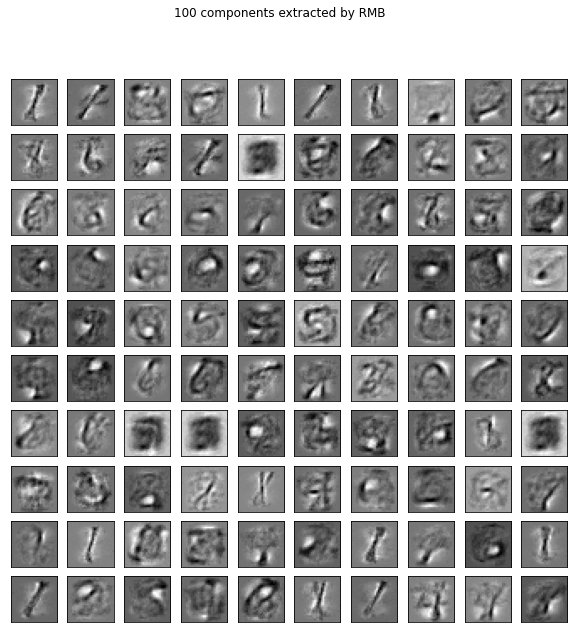

In [24]:
#繪製RMB的特徵
plt.figure(figsize=(10, 10))

for i, comp in enumerate(rbm.components_):
    plt.subplot(10, 10, i+1)
    plt.imshow(comp.reshape((28, 28)), cmap=plt.cm.gray_r)
    plt.xticks(())
    plt.yticks(())
    
plt.suptitle('100 components extracted by RMB')
plt.show()

In [25]:
#觀察是否有一樣的特徵
#雖然圖片長的類似，但實際上所有特徵都不一樣
np.unique(rbm.components_.mean(axis=1)).shape

(100,)

In [26]:
#將第一筆資料的原始784個特徵轉換成RBM的100個特徵表示方法
image_new_features = rbm.transform(images_X[:1]).reshape(100,)
image_new_features

array([9.88091768e-15, 3.60959213e-16, 6.58725534e-16, 3.18508612e-08,
       6.75329688e-20, 9.18669984e-15, 2.09949386e-11, 1.38482454e-09,
       8.53003298e-15, 7.05618006e-05, 1.34854949e-10, 3.76024613e-05,
       4.59743306e-24, 7.70912764e-15, 1.00000000e+00, 8.15166279e-01,
       3.67154687e-13, 2.55891723e-13, 3.35954462e-02, 3.35960040e-09,
       5.32563832e-09, 9.99836898e-01, 2.16414727e-10, 2.28454141e-04,
       1.98931567e-15, 2.37675789e-17, 6.86648638e-05, 8.12445106e-06,
       9.99967144e-01, 1.00000000e+00, 2.51115857e-01, 1.00305974e-09,
       3.17358602e-04, 2.18463522e-10, 9.99999796e-01, 4.83576869e-22,
       1.54805151e-19, 5.71847439e-18, 9.80911268e-07, 8.50608496e-10,
       5.29580754e-15, 9.99995075e-01, 1.15258786e-07, 3.14645022e-06,
       1.42620962e-03, 9.99999462e-01, 2.52873548e-03, 8.22719807e-19,
       1.98853737e-03, 9.99999998e-01, 3.68881636e-21, 3.64881937e-21,
       1.72142864e-12, 1.00508479e-06, 4.36872933e-17, 9.00147624e-11,
      

In [27]:
#使用神經網路架構轉換特徵
np.dot(images_X[:1]-images_X.mean(axis=0), rbm.components_.T)

array([[ -2.86056487,  -9.25862844, -12.61959026,   9.74108044,
         -9.49367734,  -6.03538185,   0.67227366, -24.47341548,
         -4.78747696,  -4.09328341,   2.46840378,  18.44018698,
        -27.38426629,  -8.22645531,  10.87529243,   9.67684582,
         -3.74346865,  -7.60415774,  17.77194158,  -2.22542242,
         -7.38883617,  27.15240725, -15.61776644,   6.24126695,
          1.45531334,  -7.89476561,   3.37066104,   9.95244466,
         25.57353458,  18.28983119,   5.56994396,  -5.46600518,
        -11.27347131,   8.79053943,  33.04245887, -26.31603567,
        -19.0113377 ,   7.47117455,   2.34453234, -40.60631499,
        -21.48932449,  29.80618254,  -2.63583228,  -7.06069989,
          2.82600766,  23.50143728,  -1.30112826, -20.95690714,
         -4.43129804,  35.40884987, -25.15176723, -21.57426146,
         -0.8221519 ,  -7.40814393, -13.14766929,   1.666369  ,
         11.1243297 , -10.18319892,   3.48573884,   3.7696705 ,
         -8.3179181 ,   3.11058454,   7.

In [28]:
#從第一個影像(數字5)中提取20個最具有代表性的特徵
top_features = image_new_features.argsort()[-20:][::-1]
print(top_features)

[62 63 69 14 29 83 49 92 34 45 41 82 28 21 15 30 77 94 18 56]


In [29]:
print(image_new_features[top_features])

[1.         1.         1.         1.         1.         1.
 1.         0.99999992 0.9999998  0.99999946 0.99999508 0.99998069
 0.99996714 0.9998369  0.81516628 0.25111586 0.10645477 0.04423764
 0.03359545 0.01406611]


> 有7個特徵可以達到100%的RBM。意味著將784像素傳入到可見層，節點62、63、69、14、29、83、49完全點亮了。

### 繪製最具代表性的特徵

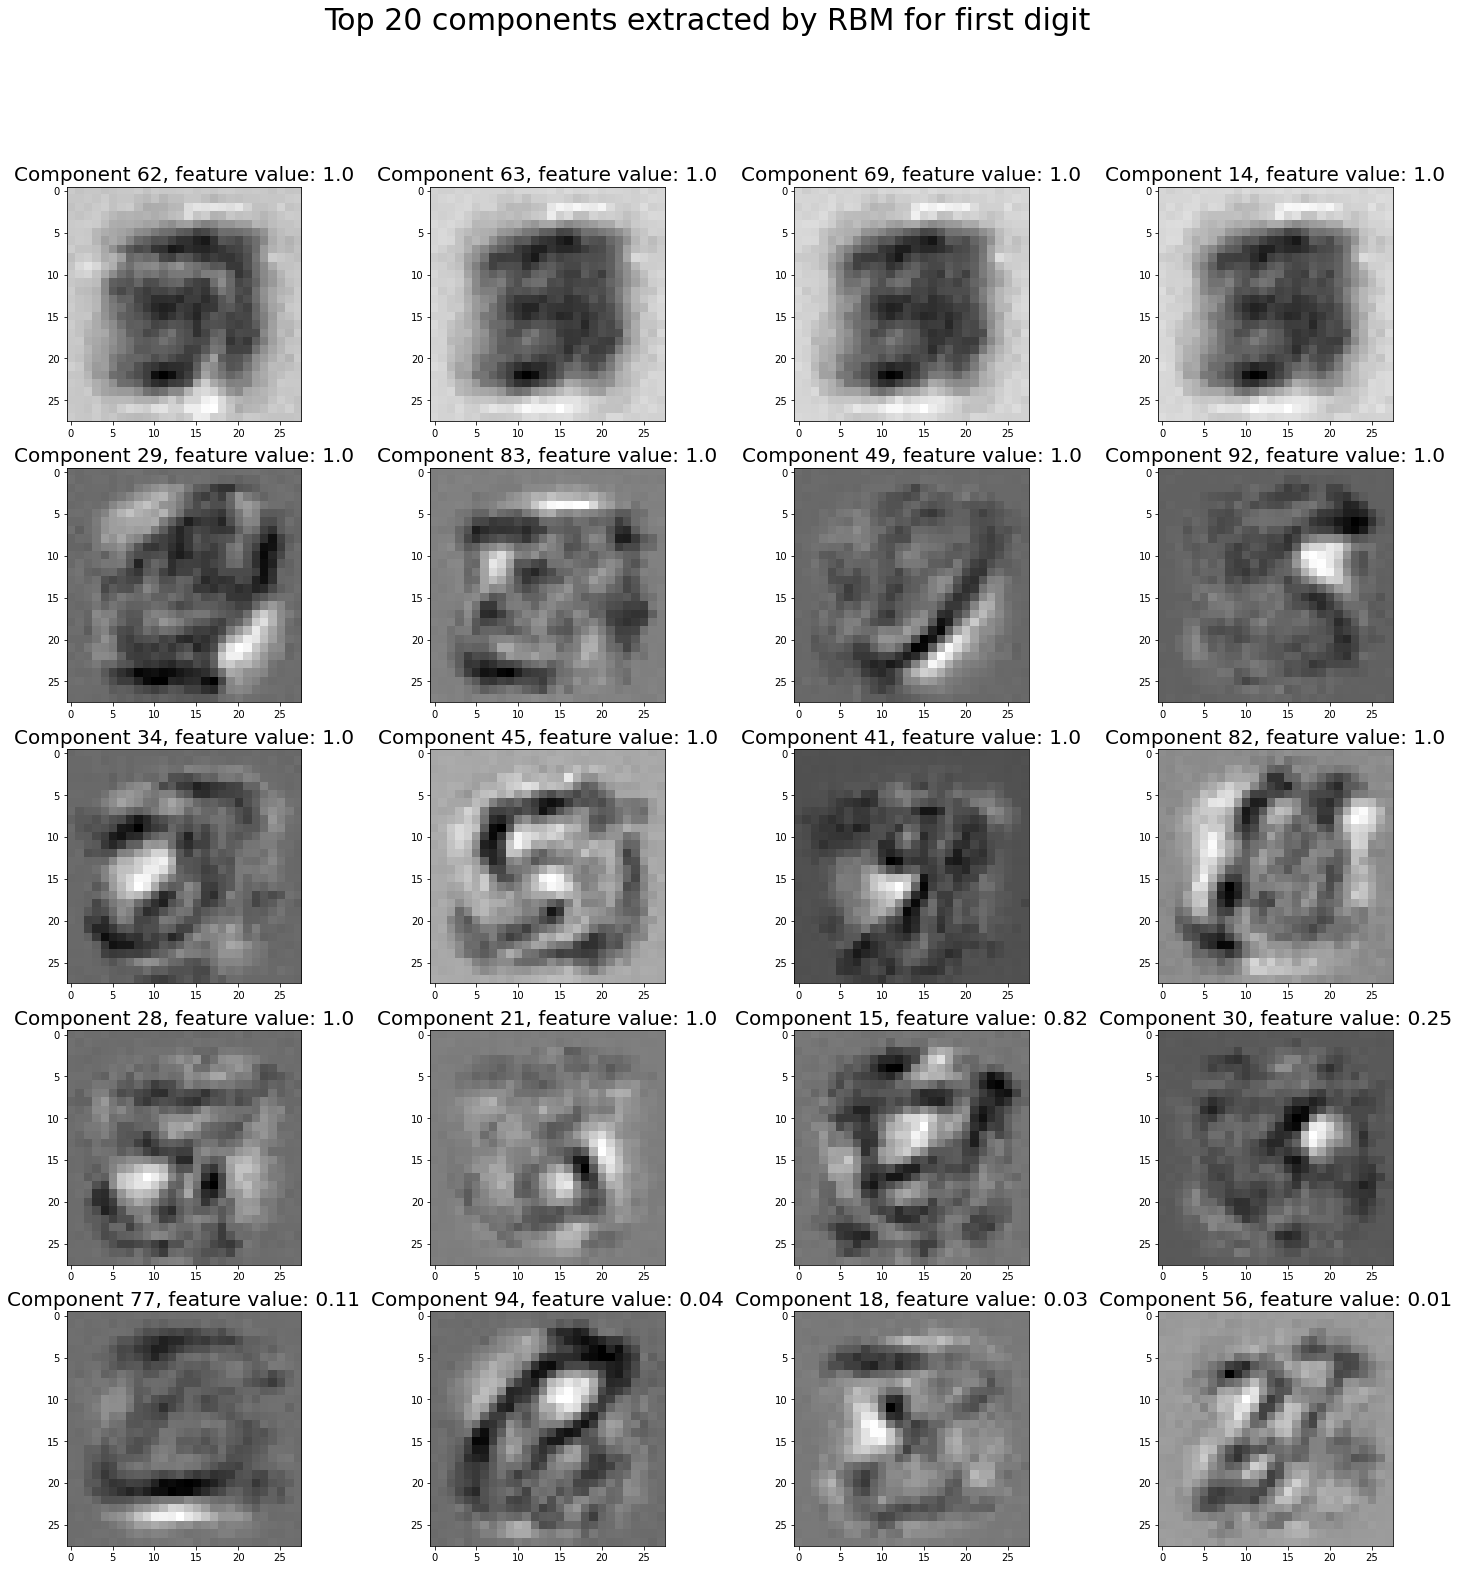

In [30]:
plt.figure(figsize=(25,25))

for i, comp in enumerate(top_features):
    plt.subplot(5, 4, i+1)
    plt.imshow(rbm.components_[comp].reshape((28,28)), cmap=plt.cm.gray_r)
    plt.title("Component {}, feature value: {}".format(comp, round(image_new_features[comp], 2)), fontsize=20)

plt.suptitle('Top 20 components extracted by RBM for first digit', fontsize=30)

plt.show()

### 繪製最差特徵

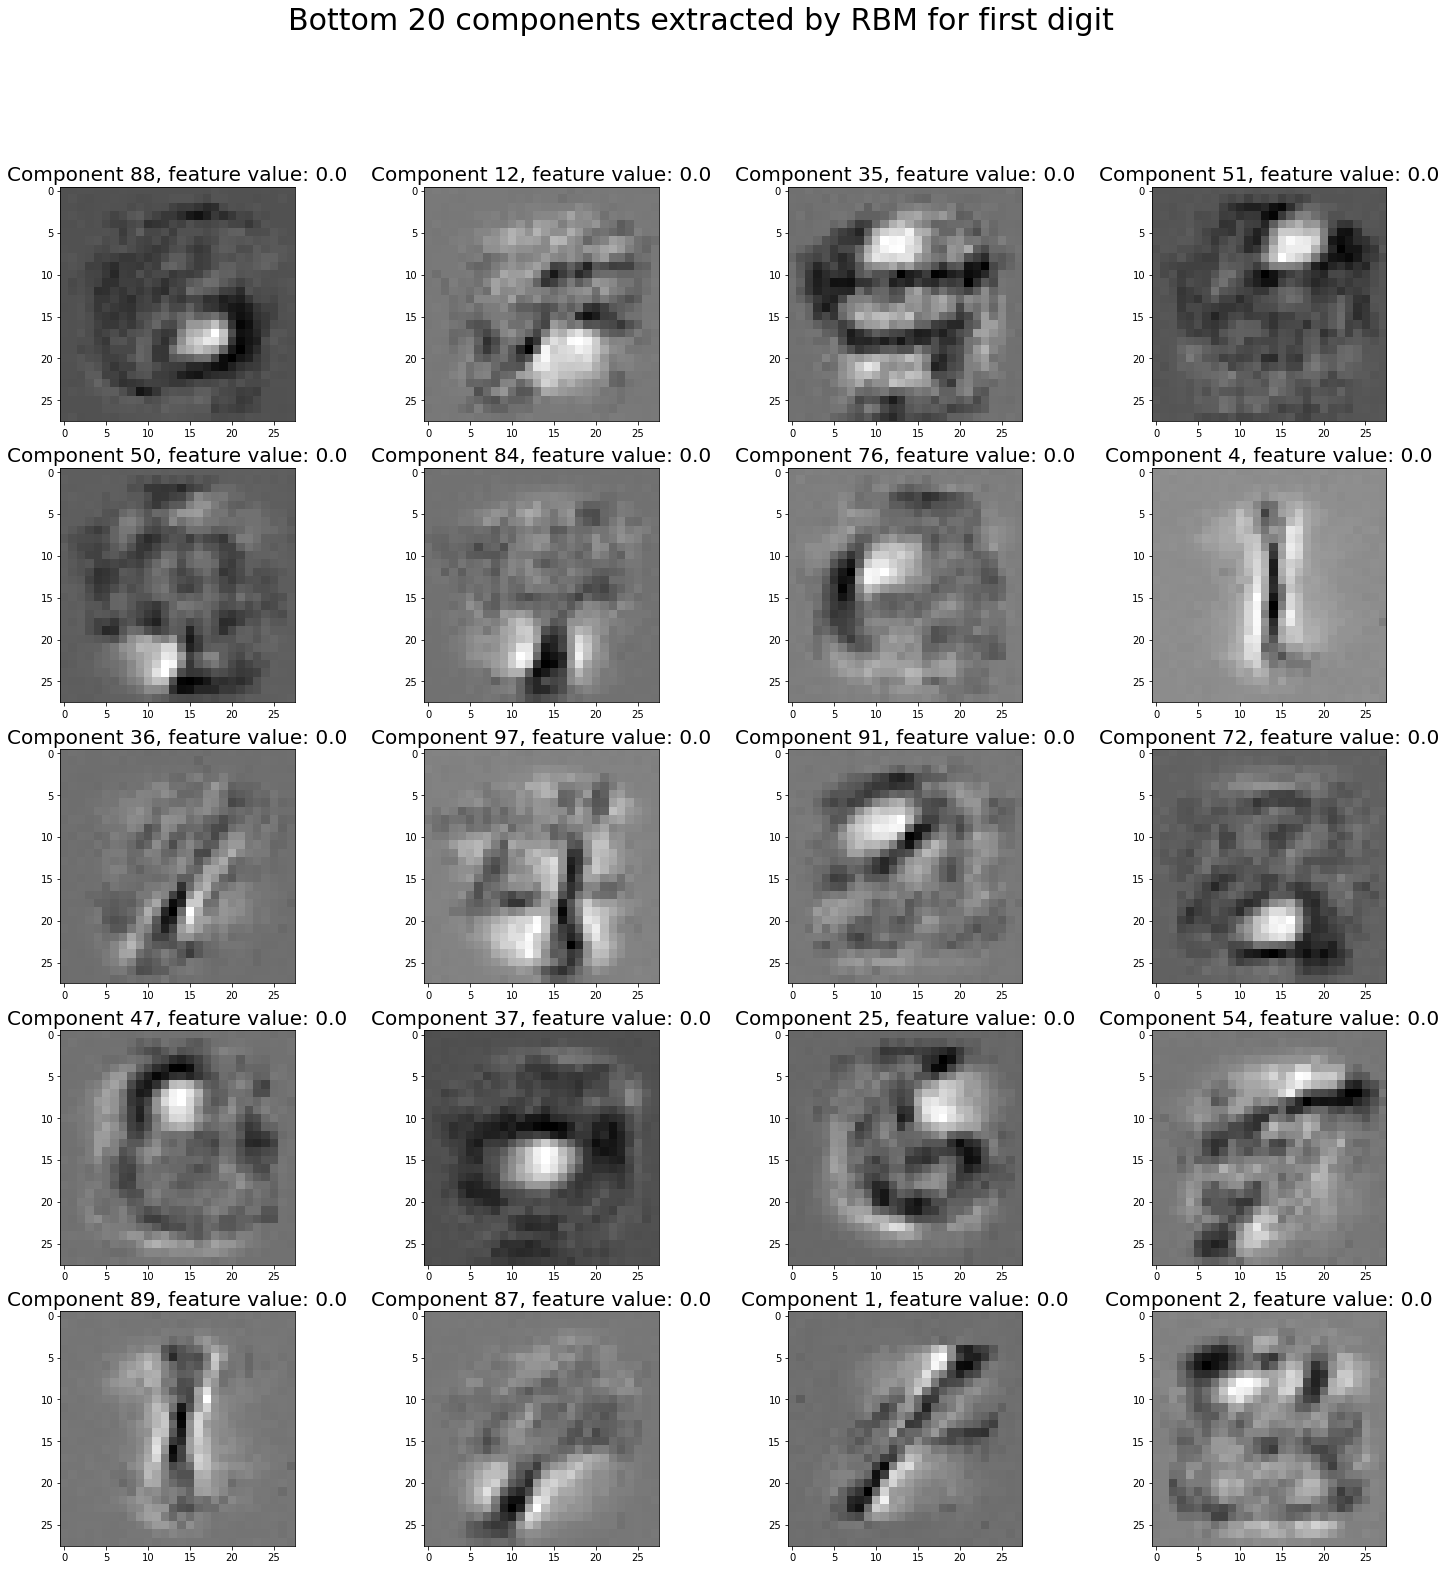

In [31]:
bottom_features = image_new_features.argsort()[:20]

plt.figure(figsize=(25,25))

for i, comp in enumerate(bottom_features):
    plt.subplot(5, 4, i+1)
    plt.imshow(rbm.components_[comp].reshape((28,28)), cmap=plt.cm.gray_r)
    plt.title("Component {}, feature value: {}".format(comp, round(image_new_features[comp], 2)), fontsize=20)

plt.suptitle('Bottom 20 components extracted by RBM for first digit', fontsize=30)

plt.show()

## 在機器學習管線上應用RBM

將比較三種不一樣的方法，觀察其成效差異
- 原始像素強度上的邏輯斯迴歸模型
- PCA主成分上的邏輯斯迴歸模型
- RBM特徵上的邏輯斯迴歸模型

### 對原始像素值應用線性模型

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

In [33]:
#建立邏輯斯迴歸模型實體與設定參數
lr = LogisticRegression()
params = {'C':[1e-2, 1e-1, 1e0, 1e1, 1e2]}

In [34]:
#產生實體網格搜尋類別
grid = GridSearchCV(lr, params)

In [35]:
#擬合資料
grid.fit(images_X, images_y)

c:\python38\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\python38\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result

c:\python38\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\python38\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1.0, 10.0, 100.0]})

In [36]:
#最佳參數
grid.best_params_, grid.best_score_

({'C': 0.1}, 0.8983333333333332)

> 不用特徵轉換或特徵學習方法，一般的線性分類就可以達到89.83%

### 對提取的PCA主成分應用線性模型

In [37]:
lr = LogisticRegression()
pca = PCA()

In [38]:
#設置管線參數
params = {'clf__C':[1e-1, 1e0, 1e1],
         'pca__n_components':[10, 100, 200]}

In [39]:
#建立管線
pipeline = Pipeline([('pca', pca), ('clf', lr)])

In [40]:
grid = GridSearchCV(pipeline, params)

In [41]:
#擬合資料
grid.fit(images_X, images_y)

c:\python38\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\python38\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result

c:\python38\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\python38\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result

GridSearchCV(estimator=Pipeline(steps=[('pca', PCA()),
                                       ('clf', LogisticRegression())]),
             param_grid={'clf__C': [0.1, 1.0, 10.0],
                         'pca__n_components': [10, 100, 200]})

In [42]:
grid.best_params_, grid.best_score_

({'clf__C': 0.1, 'pca__n_components': 200}, 0.8985)

> 使用PCA做特徵轉換，最佳主成分數量為200個，可以達到89.92%，比什麼都不做好一點

### 對提取的RBM特徵應用線性模型

In [43]:
rbm = BernoulliRBM(random_state=0)

In [44]:
params = {'clf__C':[1e-1, 1e0, 1e1],
         'rbm__n_components':[10, 100, 200]}

In [45]:
pipeline = Pipeline([('rbm', rbm), ('clf', lr)])

In [46]:
grid = GridSearchCV(pipeline, params)

In [47]:
grid.fit(images_X, images_y)

c:\python38\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\python38\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result

c:\python38\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\python38\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result

GridSearchCV(estimator=Pipeline(steps=[('rbm', BernoulliRBM(random_state=0)),
                                       ('clf', LogisticRegression())]),
             param_grid={'clf__C': [0.1, 1.0, 10.0],
                         'rbm__n_components': [10, 100, 200]})

In [48]:
grid.best_params_, grid.best_score_

({'clf__C': 1.0, 'rbm__n_components': 200}, 0.9251666666666667)

> 使用RBM所建立的特徵學習，轉換後使用200個特徵，可以達到92.52%，為__最高的準確率__。